In [193]:
## importing  libraries 
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']=(120,10)


In [194]:
#reading csv
df1=pd.read_csv('/Users/akshaybarodia/visualstudio projects/real projects/bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [195]:
##checking the shape of orginal dataset
df1.shape

(13320, 9)

In [196]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [197]:
##dropping out the unncessary parameters
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [198]:
#checking null values
df2.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [199]:
### dropping na values from dataset
df3=df2.dropna()
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [200]:
df3.shape

(13246, 5)

In [201]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [202]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-202-c379116b8702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [203]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [204]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [205]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [206]:
##for getting  the values  which are not in float
def is_float(x):
    try:
        float(x)
    except:
         return False
    return True

In [207]:
df3[~df3['total_sqft'].apply(is_float)].head(12)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [208]:
### getting  the mean values which are present in range (for example 2100 -2850)
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+ float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [209]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [210]:
##getting  a new column(price per sqrft )
df5=df4.copy()
df5['price_per_sqrft']=df5['price']*10000/df5['total_sqft']


In [211]:
len(df5['location'].unique())

1304

In [212]:
## grouping  data with respect to location
df5['location']=df5['location'].apply(lambda x:x.strip())
location_stats= df5.groupby('location')['location'].agg('count').sort_values(ascending =False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

# Dimensionality Reduction
Any location having less than 10 data points should be tagged as 'other'location.
this way number of categories can be reduced by huge amount.later on when
we do one hot encoding .it will help us with having fewer dummy  columns

In [213]:

 ### any location having less than 10 data points should be tagged as 'other'location.
 # this way number of categories can be reduced by huge amount.later on when
 # we do one hot encoding .it will help us with having fewer dummy  columns

In [214]:
## getting the number of locations with less than equal to 10 examples
len(location_stats[location_stats<=10])

1052

In [215]:
### display the locations with less examples
location_stats_lessthan_10=location_stats[location_stats<=10]
location_stats_lessthan_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [216]:
#getting the number of unique location
len(df5['location'].unique())

1293

In [217]:
df5.location= df5['location'].apply(lambda x:'other'if x in  location_stats_lessthan_10 else x)
len(df5['location'].unique())

242

In [218]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqrft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,324.786325
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,746.705710
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,1818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,482.824427
9,other,6 Bedroom,1020.0,6.0,370.00,6,3627.450980


# Outlier  removal using Busines logic
As a data scientist  when  you have= a conversation with your  business manager (who has expertise in realestate),he will tell that normally square ft per bedroom is 300(i.e 2bhk aparments is minimum  600sqft),
if you have for example 400 sqft apartment with 3 bhk than that seems suspicious and  cam be removed as an outlier. we will remove such outliers by keeping our minimum threshold per bhk to be 300 sqft 

In [219]:
df5[df5['total_sqft']/df5['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrft
9,other,6 Bedroom,1020.0,6.0,370.0,6,3627.450980
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,3333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,1066.098081
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,629.629630
70,other,3 Bedroom,500.0,3.0,100.0,3,2000.000000


In [220]:
df5.shape

(13246, 7)

In [221]:
## removing  the outliers
df6=df5[~(df5['total_sqft']/df5['bhk']<300)]
df6.shape

(12502, 7)

## outlier Removal using standard deviation and mean 

In [222]:
df6['price_per_sqrft'].describe()

count    12456.000000
mean       630.850283
std        416.812734
min         26.782981
25%        421.052632
50%        529.411765
75%        691.666667
max      17647.058824
Name: price_per_sqrft, dtype: float64

Here we find that min price per sqrft is 267 rs/sqrft whereas max is 17647,this shows a wide variation in property prices .we should remove outliers per location using mean and one standard deviation

In [223]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqrft)
        st=np.std(subdf.price_per_sqrft)
        reduced_df=subdf[(subdf.price_per_sqrft>(m-st))&(subdf.price_per_sqrft<+(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [224]:
df7=remove_pps_outliers(df6)

In [225]:
df7.shape

(10241, 7)

 Defining a function for plotting and check if for the given location how does the 2bhk & 3bhk property look like ..

In [226]:
sns.set(style='darkgrid')

In [227]:
def plot_scatterplot_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3bhk',s=50,marker='+')
    plt.xlabel('total_square feet area')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()

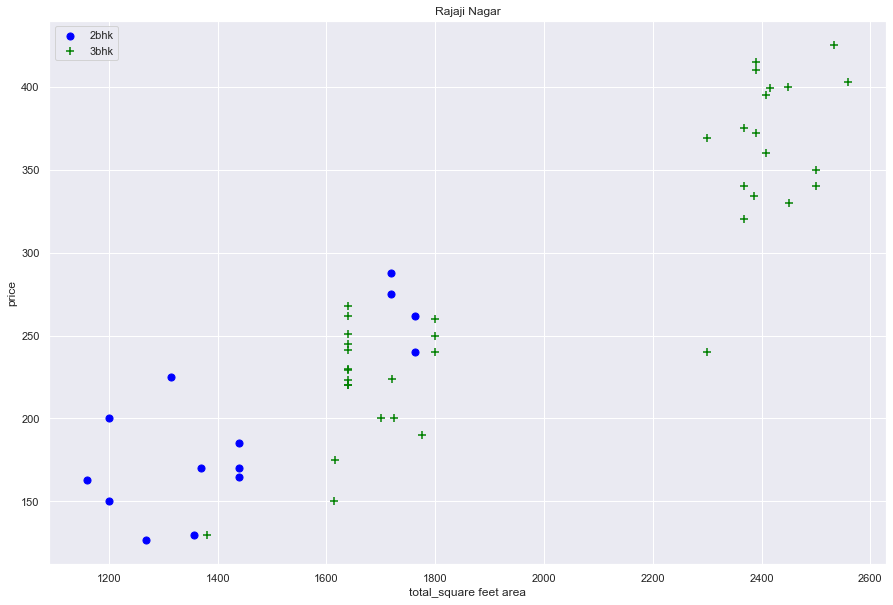

In [228]:
plot_scatterplot_chart(df7,'Rajaji Nagar')

we should also remove properties which are for the same location and the price of e.g 3bedroom apartment is 
less than 2 bedroom apartment(with same sqrft area). the way to figure out a given location  is ,we will build a dictionary of stats per bhk
{'1':{'mean':4000,'std'}:2000,'count':44},'2'{'mean':5000,'std':3300,'count':11}}
we can remove those 2bhk apartments whose price_persqrft is less than meanprice_persqrft of 1bhk apartment

In [229]:
def remove_bhk_outliers(df):
    excludes_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqrft),
                'std':np.std(bhk_df.price_per_sqrft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                excludes_indices=np.append(excludes_indices,bhk_df[bhk_df.price_per_sqrft<(stats['mean'])].index.values)
    return df.drop(excludes_indices,axis='index')

In [230]:
df8=remove_bhk_outliers(df7)

In [231]:
df8.shape

(7329, 7)

In [232]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,1501.754386
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,1190.184049
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,1253.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,1083.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,1198.380567


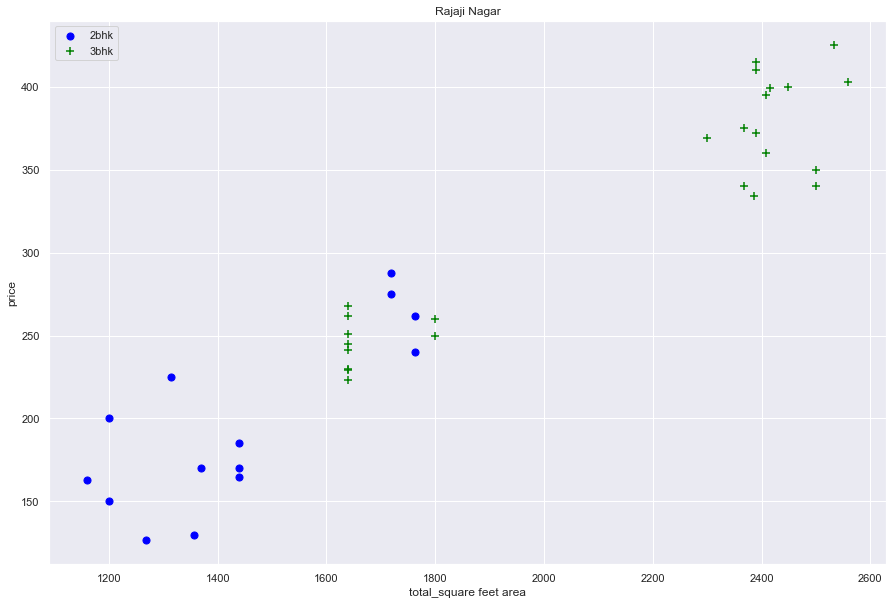

In [233]:
plot_scatterplot_chart(df8,'Rajaji Nagar')

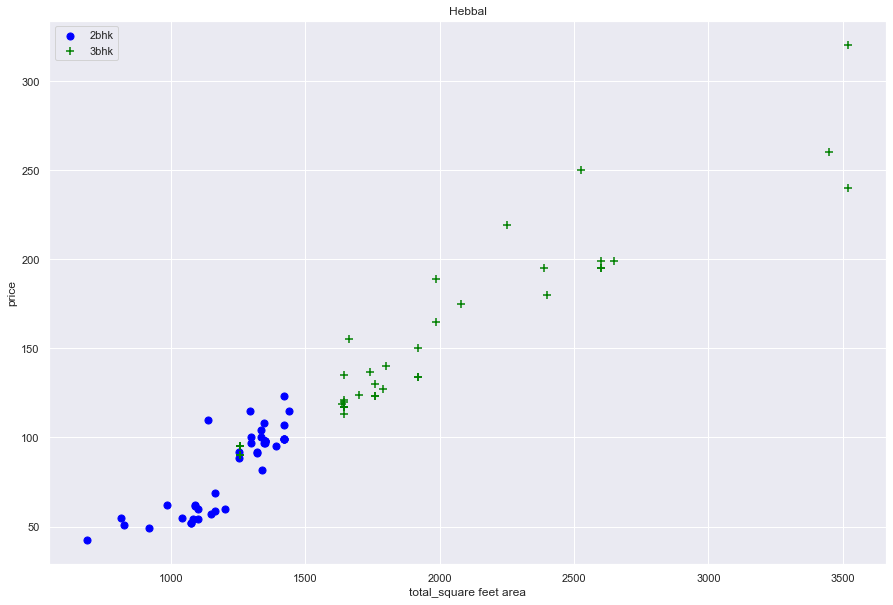

In [234]:
plot_scatterplot_chart(df8,'Hebbal')

Text(0, 0.5, 'count')

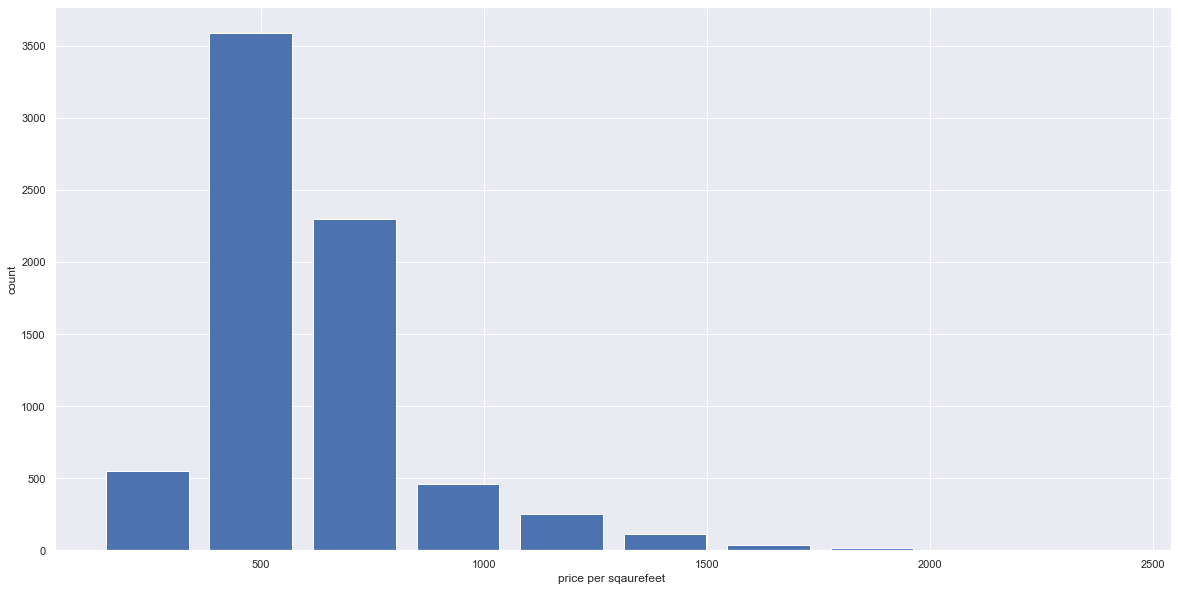

In [235]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8['price_per_sqrft'],rwidth=0.8)
plt.xlabel('price per sqaurefeet ')
plt.ylabel('count')

#### Outlier Removal Using Bathroom Feature

In [236]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'count')

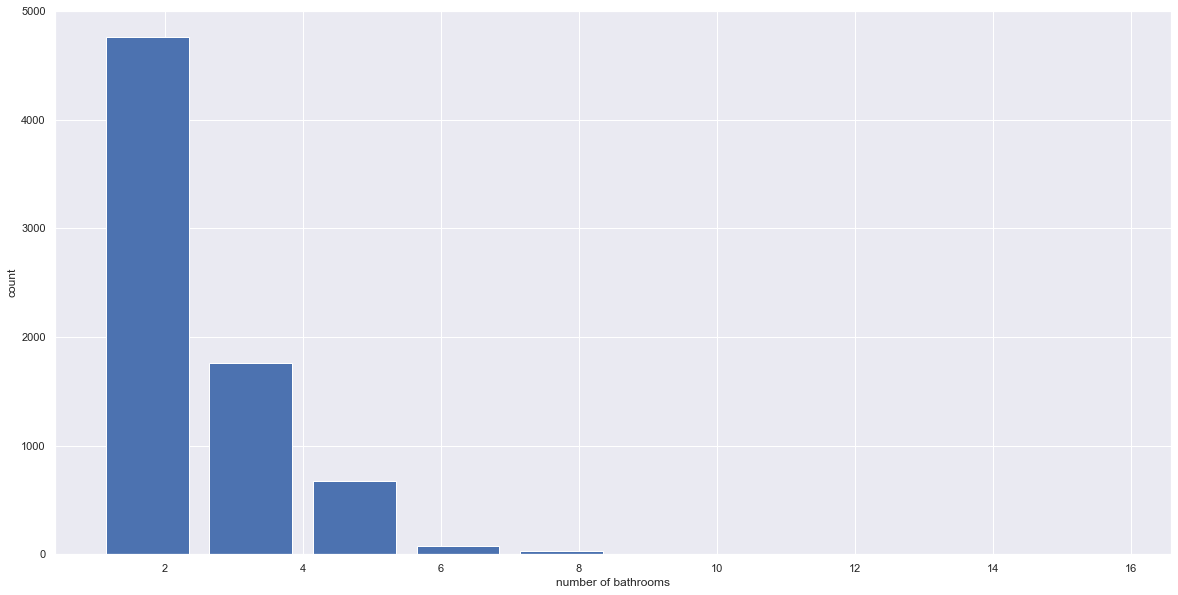

In [237]:
plt.hist(df8['bath'],rwidth=0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('count')

In [238]:
df8[df8['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqrft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,400.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,437.500000
8575,other,16 BHK,10000.0,16.0,550.0,16,550.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,250.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,506.912442


it is noticeable that to have 2 more bathrooms that number ofbedrooms in a home..

In [239]:
df8[df8['bath']>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqrft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,325.203252
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,642.857143
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,642.303433
8411,other,6 BHK,11338.0,9.0,1000.0,6,881.989769


if you have 4bedroom home and even if you have bathroom in all 4rooms plus one guest bathroom,
you will have total bath= total bed+1 max. anything above that is an outlier or data error and 
can be removed

In [240]:
df9=df8[df8.bath<df8.bhk+2]

In [241]:
df9.shape

(7251, 7)

In [242]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,1501.754386
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,1190.184049
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,1253.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,1083.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,1198.380567


In [243]:
df10=df9.drop(['size','price_per_sqrft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


#### USE ONE HOT ENCODING FOR LOCATION

In [244]:
dummies=pd.get_dummies(df10['location'])

In [245]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 #### Build the model

In [248]:
df12.shape

(7251, 245)

In [249]:
x=df12.drop(['price'],axis='columns')
x.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
y= df12['price']
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [251]:
len(y)

7251

In [252]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

In [253]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8452277697874335

####  use K Fold validation to measure accuracy of our linear regressiom model 

In [254]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)


array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

#### finding best model using GRidsearch CV

In [265]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decison_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs= GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [266]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decison_tree,0.718229,"{'criterion': 'mse', 'splitter': 'best'}"


based on above results we can say that LinearRegression gives the best score.hence we will use that
#### Test the model for few properties

In [273]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    x=np.zeros(len(x.columns))
    x[0]=sqft
    x[1]=Bath 
    x[2]=bhk 
    if loc_index >=0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]


In [274]:
predict_price('1st Phase JP Nagar',1000,2,2)

UnboundLocalError: local variable 'x' referenced before assignment

In [275]:
predict_price('Indira Nagar',1000,2,2)

UnboundLocalError: local variable 'x' referenced before assignment